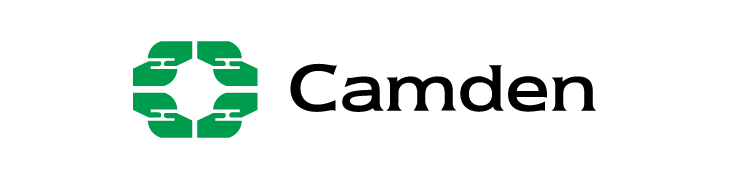

**Project Summary**

**Task 1:** Document the Data Sources <br>
**Task 2:** Load Data and Perform Initial Exploration<br>
**Task 3:** Further Inspect the Data Sets<br>
**Task 4:** Identify Missing Values<br>
**Task 5:** Identify Outliers in the Trees Dimensions<br>
**Task 6:** Identify Duplicates in the Trees Data Set<br>
**Task 7:** Identify Geolocation Issues<br>
**Task 8:** Identify Unmatched Data<br>
**Task 9:** Report back on your process<br>


    


Trees in Camden
Use this notebook to complete your analysis.
Enter code and comments after the TODOs.

There are some code cells completed for you.  These are highlighted with a <font style="color:crimson;background-color:lemonchiffon">TODO</font> comment.  You can use these to guide the subsequent tasks.  Other cells require you to read documentation or search for answers.  The markdown comments give you links to some useful documentation and articles.  Read the documentation, look at the examples provided in the documentation and then try to apply them to your data.

Remember that you can find information on the pandas functions on the Pandas website https://pandas.pydata.org/pandas-docs/stable/reference/frame.html or directly in the notebook by puttin a ? before or after the function name. for instance: `?df.head()` or `df['Maturity'].value_counts()?`

**Import of Python Libraries**

 <div class="alert alert-block alert-info">
 <span style='font-family:Georgia'> 
We will import all the python libraries required for the project which will be available for use across the tasks.
</div>`

In [1]:
# Data Manipulation
import pandas as pd

# Numerical Operations
import numpy as numpyp

# Data plotting
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import plotly


# Task 1: Document the Data Sources

# Task 2: Load Data and Perform Initial Exploration
Load the data from the supplied data files.  The files are in different **file formats**, but Pandas can handle this.

You should read the data in using the appropriate function:

- [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.read_json](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_json.html)

You can then inspect the first few rows of the loaded dataframe:

[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

You can get the number of rows and columns:

[pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

You can get the list of column names:

[pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

And you can list the data types of the columns:

[pandas.DataFrames.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

I've done the first one (loading `"camden_trees.xlsx"`) for you.  Please load `"camden_trees_environmental.csv"` and `"tree_common_names.json"` and analyse them in the same way.


## Trees
The file `"camden_trees.xlsx"` is an Excel file, so we use the `read_excel()` function.

In [2]:
# Create a Pandas dataframe called trees that contains the contents of the Excel file
trees = pd.read_excel("camden_trees.xlsx")

We can now inspect the first few rows using `head()`.  By default, `head()` displays the first 5 rows.

In [3]:
# Display the first few rows
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305.0,185240.0,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923.0,184782.0,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249.0,185261.0,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414.0,186770.0,-0.148704,51.565198,"(51.565198, -0.148704)"


It's good to understand the size of the dataset we are dealing with.  The `shape` property does this for us.

In [4]:
# Get the number of rows and columns
trees.shape

(23444, 17)

If there are lots of columns we can't always see all of them in the `head()` list above.  We can use the `columns` property to get a full list:

In [5]:
# Get a list of all the columns in the dataframe
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In order to process the data properly, we should understand the data type for each column.  Pandas attempts to work this out for us, but sometimes we need to give it a bit of a hand.  We can use the `dtypes` property to list the data types.  Note that `object` is Pandas way of saying `string`, i.e. a text data type.

In [6]:
# List the data types of each column
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                            float64
Northing                                           float64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

## Environmental
The file `"camden_trees_environmental.csv"` is a csv file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [7]:
# Create a Pandas dataframe called trees that contains the contents of the csv file
# TODO

In [8]:
# Display the first few rows
# TODO

In [9]:
# Get the number of rows and columns
# TODO

In [10]:
# Get a list of all the columns in the dataframe
# TODO

In [11]:
# List the data types of each column
# TODO

<hr/>

## Common and Scientific Names
The file `"tree_common_names.json"` is a json file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [12]:
# Create a Pandas dataframe called trees that contains the contents of the json file
# TODO

In [13]:
# Display the first few rows
# TODO

In [14]:
# Get the number of rows and columns
# TODO

In [15]:
# Get a list of all the columns in the dataframe
# TODO

In [16]:
# List the data types of each column
# TODO

<hr/>

## Review
At the end of this task you should have a good basic understanding of the contents and overall shape of the different data files.  If you don't, do back and review the outputs above.


# Task 3: Further Inspect the Datasets
The initial inspection gave you a very high-level understanding of the data.  We will now drill a bit deeper and try to understand the data column-by-column.

For columns with a string data type (`object` in Pandas) we have **qualitative** data.  It would be good to know how many *different* values we have in the column, what those values are and the *count* how many of each different value we have.  This will help us understand if the qualitative variable is **binary**, **nominal** or **ordinal**.

For columns with a numeric data type (`int` or `float`) we have **quantitative** data.  Usually integer type variables can the thought of as **discrete** and float type variables can be thought of as **continuous**.  It would be good to know some summary descriptive statistics for these columns.   

If you are unsure of what these different data classifications mean, read this:

[Types of Variables](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6051886-discover-the-four-variable-types)

You can get the list of values and counts for a column using this function:

[pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

You can get the descriptive statistics for a DataFrame using this function:

[pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Note that Pandas may treat integer columns as floats if there are null values in the columns.  So if you see a float data type it might be worth checking the actual values to confirm if it really is a float or if it really is an int with nulls.  You can check the actual values with:

[pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)



## Further Inspect the Trees Dataset
 <div class="alert alert-block alert-info">
 <span style='font-family:Georgia'> 
Let's start with the trees dataset.
</div>


### Counts of Values for String Types Columns
Go through each column that is a string (object) type and count the number of rows for each value in the column.  After each one, classify the data as binary, nominal or ordinal using a markdown comment.

I've done the first one for you.


**Site Name**

In [17]:
# List of values in Site Name column and their counts
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

Now do the same on the other string columns.  Use `value_counts()` and then classify as binary, ordered or unordered using a markdown comment.  As you do each one, stop and look at the values and counts and think about how the data in the column might be useful for supporting the council's initiatives.  Don't just treat this as a mechanical copy/paste task. The objective is, after all, to get really intimate with the data!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column as in the above example.  Add as many cells as you need.
    </font></div>

<hr/>

###  Descriptive Stats for Numeric Type Columns
Use the `describe()` function to get the descriptive stats for the numeric columns.

For each column, classify the column as discrete or continuous (use the data type to guide you, but check any floats to confirm whether they are really floats or just ints with null values.  Use `pandas.Series.unique()` to check this).


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [18]:
# Get the descriptive stats for the numeric columns
# TODO

In [19]:
# Remind ourselves of the data types
# TODO

<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>


<hr/>

Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
</div>


ENTER AS MARKDOWN HERE

<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns 
For each string column in the environmental dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
    TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.
</font></div>

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset show the descriptive stats

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [20]:
# Get the descriptive stats for all numeric columns
# TODO

In [21]:
# Remind ourselves of the data types
# TODO

<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>

<hr/>


Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
    </font></div>


ENTER MARKDOWN HERE

<hr/>

### 3.3 Further Inspect the Common Names Dataset
Now repeat the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns 
For each string column in the common names dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
<font color="crimson">TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.</font>
    </font></div>


<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values
Find the number of missing values in each column.  Missing values can indicate data quality issues.  Missing are nulls in our data.  But sometimes zero values indicate missing values.  For example, a zero value for a tree height is clearly not a valid valid, so should be considered missing.

Use these functions to find rows that have missing and zero values:

- [pandas.DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
- [pandas.DataFrame.isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)
- [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
- [pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

As you go through this task, think about the possible impact of the missing values on the ability of the data to deliver on the council's initiatives.  There is no absolute answer to "how many missing values is too many".  It depends on the context of what you intend to do with the data.  Try to make an interpretation based on your understanding of the requirements.

### 4.1 Missing Values for the Trees Dataset
I've shown you how to do this for the trees dataset.

In [22]:
# Percentage of null values
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [23]:
# Number of null values
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [24]:
# Percentage of zero values
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

In [25]:
# Number of zero values
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

In [26]:
# Percentage of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.004905
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.017105
Inspection Due Date                         0.017105
Height In Metres                            0.026019
Spread In Metres                            0.030498
Diameter In Centimetres At Breast Height    0.030370
Ward Code                                   0.009640
Ward Name                                   0.009640
Easting                                     0.002389
Northing                                    0.002389
Longitude                                   0.002389
Latitude                                    0.002389
Location                                    0.002389
dtype: float64

In [27]:
# Number of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

### 4.2 Missing Values for the Environmental Dataset
Now repeat the missing values check for the environmental dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [28]:
# Percentage of null values
# TODO

In [29]:
# Number of null values
# TODO

In [30]:
# Percentage of zero values
# TODO

In [31]:
# Number of zero values
# TODO

In [32]:
# Percentage of null and zero values
# TODO

In [33]:
# Number of null and zero values
# TODO

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeat the missing values check for the common names dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Add as many cells as you need.
    </font></div>

<hr/>

### 4.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about the state of missing values below and comment on the extent to which this might impact the ability to deliver on the council's initiatives.
    </font></div>


ENTER MARKDOWN HERE


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions
Outliers are values that are so unusual they are possibly incorrect!  We can use a boxplot to show the spread of data and any outliers.  Read the following section if you are unfamiliar with them:

- [Box plots](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6052306-calculate-the-value-spread-in-your-data#/id/r-6133902)

Any circles represent what the boxplot considers outliers, but some of these might just be correct but extreme values.  We want to only highlight really *crazy* values which are clearly incorrect.

We can use this function to draw boxplots:

- [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

Once we have found if there are outliers, it would be nice to show the rows containing the outliers.  The technique for filtering Pandas DataFrames is described here:

- [Filtering Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)

The filtering technique creates a mask of rows that we want to select, e.g:

`mask = df['mycolumn'] > 500`

and then uses the mask to select rows:

`df[mask]`

Note that there is no absolute definition of what "crazy" means here.  You will need to make some judgements based on your understanding of the world (or specifically the world of trees in Camden!).

### 5.1 Outliers for Height
Find the outliers in the tree height column.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [34]:
# Use a boxplot to find the outliers
# TODO

In [35]:
# Select the crazy outlier rows
# TODO

<hr/>

### 5.2 Outliers for Spread
Now repeat the analysis for spread.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [36]:
# Use a boxplot to find the outliers
# TODO

In [37]:
# Select the crazy outlier rows (if any)
# TODO

<hr/>

### 5.3 Outliers for Diameter
Now repeat the analysis for diameter.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [38]:
# Use a boxplot to find the outliers
# TODO

In [39]:
# Select the outlier rows (if any)
# TODO

<hr/>

### 5.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about outliers in the data.  What assumptions did you make?  Were you comfortable making these assumptions?
    </font></div>


ENTER MARKDOWN HERE

<hr/>

## Task 6: Identify Duplicates in the Trees Dataset
Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique.  Find out if it is!  We've already used a function that can count how many times each value in a column exists.  Use is to see if we have duplicates in the trees Dataframe.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [40]:
# Find out if we have any duplicates
# TODO

Now see if you can select the rows from trees DataFrame that are duplicates.  You will need to use the output from the cell above and use it to filter the trees dataframe.

In [41]:
# Select the rows that are duplicated
# TODO

<hr/>

### 6.2 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observations about duplicates in trees.
    </font></div>


ENTER MARKDOWN HERE

<hr/>

## Task 7: Identify Geolocation Issues
The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!

We will make a copy of the original trees dataset and remove any rows that have a missing easting or northing as these can't be plotted on the map.

We can copy the DataFrame using:

- [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)

We can use the DataFrame filtering technique we saw before to remove the missing values.  E.g. the following code filters out rows where the value for 'mycolumn' is 100:

    mask = df['mycolumn'] != 100
    df = df[mask]

You can also create masks using a function, e.g. this creates a mask which excludes nulls:

    mask = df['mycolumn'].isnull()

We can use this function to plot the trees on a map. Set x to "Easting" and y to "Northing" and set a figsize parameter to (6, 6) to get a square aspect ratio:

- [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html)




### 7.1 Remove Trees with Missing Geo-coordinates
Check if there are any rows with null or 0 geo-coordinates.  If there are, remove them as we can't plot these.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [42]:
# Make a copy of the trees
geotrees = trees.copy()

In [43]:
# Remove null Eastings
# TODO

In [44]:
# Remove 0 Eastings.  
# TODO

In [45]:
# Remove null Northings
# TODO

In [46]:
# Remove 0 Northings.  
# TODO

In [47]:
# Confirm how many rows we have
# TODO

<hr/>

### 7.2 Plot Map of Trees
Now make the plot.  Do a scatter plot of Northing vs Easting. You should obtain an outline of the map of Camden. Compare that outline with a real map of Camden (use good old google maps!). You’ll be able to spot the trees that should not be in that dataset from there!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

In [48]:
# Plot the trees on a map
# TODO

### 7.3 Find Trees Outside Camden
From the scatter plot, you should be able to determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)

Select the rows containing trees outside of Camden.  Use the filter technique again.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [49]:
# Select the outlier rows
# TODO

In [50]:
# Confirm how many rows we have
# TODO

<hr/>

### 7.4 Observations


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about geolocation issues.
    </font></div>


ENTER MARKDOWN HERE

<hr/>

## Task 8: Identify Unmatched Data
We have multiple datasets that will need to be joined together to produce the analyses required by the Camden Parks and Open Spaces team.  The data will need to be joined in the following way:

- Use the `Identifier` column in the trees dataset to match to the `Identifier` column in the environmental data set (so we can bring in the environmental data for each tree)
- Use the `Scientific Name` column in the trees dataset to match to the `Scientific Name` column in the common names data set (so we can look up the `Common Name`)

There may be mismatches in the data.  Of particular concern we want to check

- That every tree in the trees dataset has matching environmental data in the environmental data set
- That every environmental row in the environmental dataset has matching tree data in the tree data set
- That every scientific name in the trees dataset has a matching common name in the common names data set

We aren't too concerned about the reverse of the last scenario (if we have extra names in the common names dataset that aren't in the trees data set).  We don't expect Camden to have a specimen of every tree that exists!  

There are a few ways this can be done, but one technique is to use the `isin` function to check if some column in one dataframe contains values that are in another column in another dataframe.  This creates a mask containing rows that match between the two dataframes:

    mask = df1['column_name1'].isin(df2['column_name2'])
    
To select the non-matching rows, we can use Python's bitwise not operator ~:

    mask = ~df1['column_name1'].isin(df2['column_name2'])
    
As we have seen before, the mask can be used to select that subset of rows back from the original dataframe.

### 8.1 Find Trees that Don't have Matching Environmental Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [51]:
# Find trees that don't have matching environmental data
# TODO

In [52]:
# Confirm how many rows we have
# TODO

### 8.2 Find Environmental Data that Doesn't have Matching Tree Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [53]:
# Find environmental data that doesn't have matching tree data
# TODO

In [54]:
# Confirm how many rows we have
# TODO

### 8.3 Find Trees that Don't have Matching Common Names Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [55]:
# Find trees with scientific names that don't have matching common names data
# TODO

In [56]:
# Confirm how many rows we have
# TODO

<hr/>

### 8.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about unmatched data issues.
    </font></div>


ENTER MARKDOWN HERE

<hr/>

# END OF NOTEBOOK